---

---

# Predição de diabetes

Este notebook implementa uma rede neural para predizer se um paciente tem diabetes ou não com base em certas medidas diagnósticas incluídas no conjunto de dados.

O conjunto de dados utilizado descreve os dados do prontuário médico do paciente dos [índios Pima](https://pt.wikipedia.org/wiki/Pima) e se eles começaram a desenvolver diabetes em cinco anos.

Trata-se de um problema de classificação binária (início do diabetes como 1 ou não como 0). Todas as variáveis ​​de entrada que descrevem cada paciente são numéricas.

Utiliza-se a API callback **ModelCheckpoint.**

*Obs: o modelo apresentado aqui não está otimizado uma vez que o objetivo deste notebook é o de apresentar a aplicação da função callback ModelCheckpoint".*


---



---




## Conjunto de dados

- Fonte: https://www.kaggle.com/uciml/pima-indians-diabetes-database
- Proprietários originais: National Institute of Diabetes and Digestive and Kidney Diseases
- Doadores da base de dados: Vincent Sigillito (vgs@aplcen.apl.jhu.edu), 
Research Center, RMI Group Leader, Applied Physics Laboratory, The Johns Hopkins University (1990)

Detalhes sobre o conjunto de dados:

1. Número de instâncias: 768

2. Número de atributos: 8 (mais classe target)

3. Atributos: (todos com valor numérico)
   1. Número de vezes que engravidou (*Pregnancies*)
   2. Concentração de glicose plasmática a 2 horas em um teste de tolerância à glicose oral (*Glucose*)
   3. Pressão arterial diastólica (mm Hg) (*BloodPressure*)
   4. Espessura da dobra da pele do tríceps (mm) (*SkinThickness*)
   5. Insulina sérica de 2 horas (mu U / ml) (*Insulin*)
   6. Índice de massa corporal (peso em kg / (altura em m) ^ 2) (*BMI*)
   7. Função de pedigree de diabetes (*DiabetesPedigreeFunction*)
   8. Idade (anos) (*Age*)
   
4. Variável target (classe): 0 ou 1 (valor de classe 1 é interpretado como "teste positivo para diabetes")

   Classe Valor Número de instâncias
   - 500 => 0
   - 268 => 1

 

## Leitura e preparação dos dados

Vamos começar importando o arquivo CSV bruto usando o Pandas.

In [1]:
import pandas as pd

# Clone do repositório de dados do GitHub
!git clone https://github.com/malegopc/AM2PUCPOC
# lê arquivo de dados, atribue NaN para dados faltantes e rótulos em cada coluna
diabetes = pd.read_csv('/content/AM2PUCPOC/Datasets/Indians_Diabetes/diabetes.csv', na_values=['?'])
# imprime as 5 primeiras linhas dos dados montados
diabetes.head()

Cloning into 'AM2PUCPOC'...
remote: Enumerating objects: 570, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 570 (delta 33), reused 0 (delta 0), pack-reused 472
Receiving objects: 100% (570/570), 11.45 MiB | 13.10 MiB/s, done.
Resolving deltas: 100% (182/182), done.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Separa os atributos das classes

Extrai os atributos e as classes (rótulos) colocando-os em duas variáveis separadas (na forma que o Keras espera).

In [2]:
X = diabetes.drop('Outcome', axis=1).values
y = diabetes['Outcome'].values
print(X.shape)
print(y.shape)

(768, 8)
(768,)


## Divide o conjunto de dados em treino e teste

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(576, 8)
(576,)
(192, 8)
(192,)


## Criação do modelo de rede neural




In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# 1a. camada oculta com 20 neurônios (definição das entradas)
model.add(Dense(20, input_dim=X_train.shape[1], activation='relu'))
# 2a. camada oculta com 10 neurônios
model.add(Dense(10, activation='relu'))
# camada de saída com um neurônio
model.add(Dense(1, activation='sigmoid'))
# sumário (resumo) do modelo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


## Compilação do modelo

In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## Treinamento do modelo

In [6]:
from keras.callbacks import ModelCheckpoint

# Salva o melhor modelo
mckp = ModelCheckpoint(filepath = 'model_best.h5', monitor = 'val_loss', save_best_only = True, verbose = 1)
history = model.fit(X_train,y_train, validation_data=(X_test,y_test), batch_size=8, epochs=200, callbacks=[mckp])

Epoch 1/200
72/72 [==============================] - 14s 8ms/step - loss: 2.0454 - accuracy: 0.5892 - val_loss: 0.7506 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 0.75065, saving model to model_best.h5
Epoch 2/200
72/72 [==============================] - 0s 2ms/step - loss: 0.7064 - accuracy: 0.6964 - val_loss: 0.7338 - val_accuracy: 0.6146

Epoch 00002: val_loss improved from 0.75065 to 0.73383, saving model to model_best.h5
Epoch 3/200
72/72 [==============================] - 0s 2ms/step - loss: 0.7222 - accuracy: 0.6678 - val_loss: 0.7103 - val_accuracy: 0.6719

Epoch 00003: val_loss improved from 0.73383 to 0.71035, saving model to model_best.h5
Epoch 4/200
72/72 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6512 - val_loss: 0.7269 - val_accuracy: 0.6406

Epoch 00004: val_loss did not improve from 0.71035
Epoch 5/200
72/72 [==============================] - 0s 2ms/step - loss: 0.6538 - accuracy: 0.6633 - val_loss: 0.7206 - val_ac

## Avaliação do modelo

In [7]:
precisao = model.evaluate(X_test, y_test, verbose=0)
print("Função de erro/loss final = %.4f" % precisao[0])

Função de erro/loss final = 0.6461


## Análise da função loss (erro/perda)

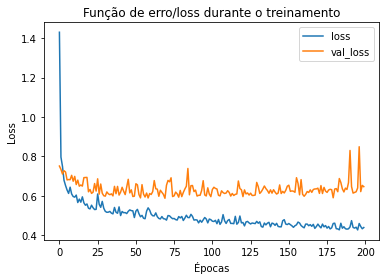

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], '')
plt.xlabel("Épocas")
plt.ylabel('Loss')
plt.title('Função de erro/loss durante o treinamento')
plt.legend(['loss', 'val_loss'])
plt.show()

## Análise da métrica de desempenho (acurácia)

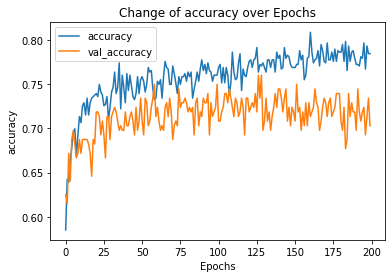

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], '')
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.title('Change of accuracy over Epochs')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

## Avaliando o melhor modelo salvo pelo ModelCheckpoint

In [10]:
from keras.models import load_model

model_best = load_model('/content/model_best.h5')
model_best.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                210       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [11]:
precisao = model_best.evaluate(X_test, y_test, verbose=0)
print("Função de erro/loss final = %.4f" % precisao[0])

Função de erro/loss final = 0.5871
